# Music Feature Extraction of FMA Audio Data

In this notebook we will cover the methods used to perform audio content analysis on the songs gathered from the Free Music Archive dataset, located at https://github.com/mdeff/fma.

In [35]:
%matplotlib inline

from matplotlib import pyplot as plt
from librosa import feature, load, amplitude_to_db, display as lrd
from IPython import display as ipd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (15, 6)

## Load Audio

First we load audio using librosa. We can then play manually inspect the audio and plot its time-domain waveform.

In [25]:
audio, sample_rate = load('../data/fma_large/000/000002.mp3')

ipd.Audio(audio, rate=sample_rate)

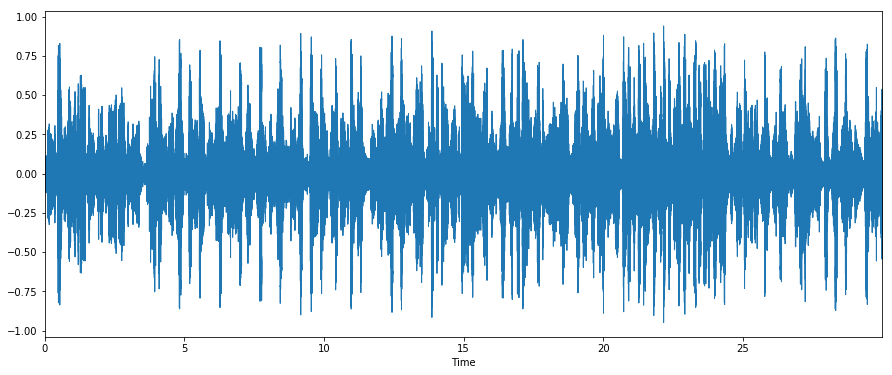

In [20]:
lrd.waveplot(audio, sample_rate)

A spectrogram, similar to the above waveplot, is a visual representation of audio. However, where the waveplot shows amplitude over time, the spectrogram shows frequencies over time.

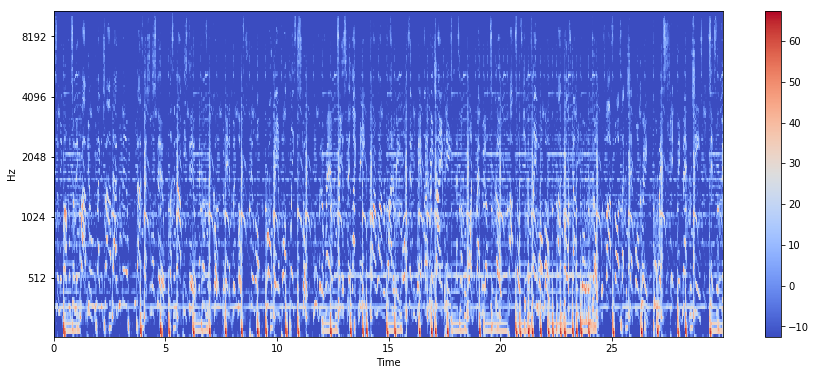

In [27]:
amp = feature.melspectrogram(audio, sample_rate)
spec = amplitude_to_db(amp)

lrd.specshow(spec, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar()

## Mel-Frequency Cepstrum Coefficients

The Mel-Frequency Cepstrum Coefficients, or MFCCs, of an audio file are, as the name suggests, the coefficients that make up the Mel-Frequency Cepstrum of the sound. The Mel-Frequency Cepstrum is a representation of the power-spectrum of a sound, and MFCCs are very commonly used in genre classification tasks like the one we are attempting here. Extracting the MFCCs can be complicated, usually involving taking the fourier transform of the signal applying discrete cosine transforms to the logs of the powers at each of the Mel frequencies of the output. Luckily for us, librosa has a built-in implementation that we can use by simply calling $\texttt{feature.mfcc()}$ on the audio signal.

In [41]:
n = 10
std_scalar = StandardScaler()
mfcc_unscaled = feature.mfcc(audio, sample_rate, n_mfcc=n).T
mfcc = DataFrame(std_scalar.fit_transform(mfcc_unscaled))

mfcc.head()

,0,1,2,3,4,5,6,7,8,9
0,-4.305211,1.093410,-0.782354,0.505065,-0.180995,-0.477088,0.136023,-0.688051,1.651818,-1.906706
1,-2.505865,0.976739,-1.114163,0.832015,-0.511878,-0.383278,0.322291,-0.539981,0.853935,-1.094006
2,-1.717112,0.033967,-0.412785,-0.148692,-0.152571,-0.210461,0.635801,-0.520481,0.159076,-0.178886
3,-0.891486,-1.868067,1.052698,-1.575808,-0.256157,0.272059,-0.323355,-0.285634,0.025714,-0.193910
4,-0.241643,-2.751526,0.810573,-1.896605,-0.249361,0.181307,-0.278737,0.471178,0.512894,0.150101


After extracting the MFCCs we normalize them such that they are centered at 0 (or $\epsilon$ close to 0) with a standard deviation of 1. We can make the dimensions of the resulting matrix smaller or larger by adjusting $n$ in the above script. 

These methods are used in the python file mfcc_file_builder.py to create features.csv. A handful of songs could not be analyzed in this way due to a technical issue with the audioread library. The identification numbers of the failed files are as follows:

50782

50594

102247

10224

102289

102241

102249

96210

9620

96207

5574

101272

101265

101275

42986

29346